In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [2]:
'''DATA LOAD'''
df = pd.read_excel('Final_data_binary.xlsx', sheet_name='AIN')
X = df.drop('ocena', axis=1)
X

,DF_PressHeight(mm),ProgramNo,Output(kW),Runout(mm),PointX,PointY,Point,BottleLength(mm),DF_Force(kN),Pilot_Volt(V),...,Weighton_Cup(g),Exposureon_Hopper(m),HID,CID.2,Exposureon_Work(m),Weighton_Cup(g).1,Exposureon_Hopper(m).1,HID.1,CID.3,Exposureon_Work(m).1
0,0.003,2,1.81,0.17,-0.55,-300.44,0,98.01,14.9,13.2,...,9.494,1.033333,26,4,4.750000,2.267,1.116667,20,2,3.300000
1,0.010,2,1.81,0.16,-0.56,-300.44,0,98.05,13.7,13.2,...,9.488,1.033333,26,3,4.583333,2.269,0.266667,32,4,3.500000
2,0.007,2,1.81,0.09,-0.54,-300.44,0,98.05,13.5,13.2,...,9.457,1.033333,26,4,3.500000,2.291,1.116667,20,1,3.566667
3,0.017,2,1.81,0.16,-0.52,-300.44,0,98.04,13.7,13.2,...,9.488,1.033333,26,4,3.100000,2.246,0.266667,32,3,3.716667
4,0.023,2,1.81,0.15,-0.57,-300.44,0,98.02,16.0,13.2,...,9.437,1.016667,25,2,3.416667,2.289,1.116667,20,2,3.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7903,-0.008,2,1.81,0.08,39.42,-300.20,0,98.09,18.1,15.2,...,9.582,0.300000,26,2,6.966667,2.254,2.750000,32,3,5.983333
7904,-0.010,2,1.81,0.10,39.42,-300.20,0,98.03,18.1,14.4,...,9.526,0.233333,28,4,6.966667,2.317,0.183333,33,2,2.366667
7905,-0.003,2,1.81,0.07,39.42,-300.20,0,98.11,17.9,14.0,...,9.619,0.300000,26,1,6.983333,2.226,2.750000,32,4,5.183333
7906,-0.039,2,1.81,0.09,39.42,-300.20,0,98.07,18.0,13.6,...,9.616,0.233333,28,3,6.900000,2.348,0.183333,33,1,5.133333


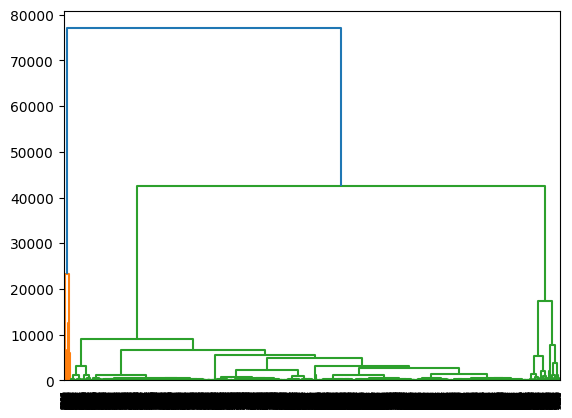

In [4]:
dendogram = sch.dendrogram(sch.linkage(X, method='ward'))


In [8]:
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')

In [9]:
y = hc.fit_predict(X)

In [10]:
X = df
X['Cluster']=y
print(X.Cluster.value_counts())

0    7801
1     107
Name: Cluster, dtype: int64


In [11]:
'''Group Cluster by OK/NG'''
print(X.groupby('Cluster')['ocena'].value_counts())

Cluster  ocena
0        1        6606
         0        1195
1        1          94
         0          13
Name: ocena, dtype: int64


In [12]:
'''Count OK/NG ratio for each Cluster'''
cluster_df = pd.DataFrame()
for i in range(0,2):
    value = X.groupby('Cluster')['ocena'].value_counts()[i][0]/X.groupby('Cluster')['ocena'].value_counts()[i][1]
    row = {'Cluster': i, 'value ratio': value}
    cluster_df = cluster_df.append(pd.Series(row), ignore_index=True)
print(cluster_df)

C:\Users\kmarcinski\AppData\Local\Temp\ipykernel_6516\2826386715.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_df = cluster_df.append(pd.Series(row), ignore_index=True)
C:\Users\kmarcinski\AppData\Local\Temp\ipykernel_6516\2826386715.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  cluster_df = cluster_df.append(pd.Series(row), ignore_index=True)


KeyError: 2